# ĐỒ ÁN CUỐI KỲ

Họ tên: Huỳnh Công Sinh

MSSV: 1712724

## Giới thiệu

Em thấy rằng trong những năm gần đây, những thảm họa thiên nhiên xuất hiện ngày càng nhiều. Không những thế, mức độ nghiêm trọng của nó cũng có dấu hiệu tăng lên. Do đó, ở trong đồ án cuối kỳ môn Lập trình cho Khoa học dữ liệu, em sẽ nghiên cứu về vấn đề này.

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image, display

## Lấy dữ liệu

- Tài liệu nghiên cứu của em là file 'Disaster.csv'. File này tổng hợp các thảm họa thiên nhiên về địa lý, khí tượng, thủy văn, khí hậu.
- Nguồn được lấy từ trang **https://public.emdat.be/**. Quyền truy cập vào dữ liệu được UCL cung cấp miên phí. Chi tiết xem tại [đây](https://www.emdat.be/frequently-asked-questions#:~:text=What%20are%20the%20conditions%20of,of%20charge%20by%20the%20UCL.).
- Trong file này, địa điểm thu thập dữ liệu bao gồm có **Châu Á** và **Châu Đại Dương** từ năm **2000 đến nay**.

---

## Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [2]:
disaster_df = pd.read_csv('disaster.csv', engine='python')
disaster_df.head(10)

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,2000-0372-CHN,2000,372,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,30.0,43.0,10.0,NaN,31000.0,31010.0,NaN,NaN,19000.0,67.355759
1,2000-9186-AFG,2000,9186,Natural,Climatological,Drought,Drought,NaN,NaN,Affected,...,NaN,37.0,NaN,2580000.0,NaN,2580000.0,NaN,NaN,50.0,67.355759
2,2000-0373-BGD,2000,373,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Affect,...,24.0,11.0,50.0,200000.0,NaN,200050.0,NaN,NaN,NaN,67.355759
3,2000-0484-BTN,2000,484,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,30.0,200.0,NaN,NaN,1000.0,1000.0,NaN,NaN,NaN,67.355759
4,2000-0677-CHN,2000,677,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Affect,...,18.0,10.0,NaN,200000.0,NaN,200000.0,NaN,NaN,25366.0,67.355759
5,2000-0920-CHN,2000,920,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,5.0,26.0,NaN,NaN,4500.0,4500.0,NaN,NaN,5000.0,67.355759
6,2000-0472-CHN,2000,472,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,14.0,203.0,214.0,NaN,18000.0,18214.0,NaN,NaN,172000.0,67.355759
7,2000-9495-ARM,2000,9495,Natural,Climatological,Drought,Drought,NaN,NaN,Affected,...,NaN,NaN,NaN,297000.0,NaN,297000.0,NaN,NaN,100000.0,67.355759
8,2000-0097-AUS,2000,97,Natural,Meteorological,Storm,Tropical cyclone,NaN,Steve,Declar/Int,...,13.0,1.0,NaN,200.0,NaN,200.0,NaN,10000.0,90000.0,67.355759
9,2000-0283-BGD,2000,283,Natural,Meteorological,Storm,NaN,NaN,NaN,Kill,...,19.0,36.0,NaN,70000.0,1000.0,71000.0,NaN,NaN,NaN,67.355759


### Tổng quát về data

In [3]:
print('Shape:', disaster_df.shape)
disaster_df.info()

Shape: (3261, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           3261 non-null   object 
 1   Year                             3261 non-null   int64  
 2   Seq                              3261 non-null   int64  
 3   Disaster Group                   3261 non-null   object 
 4   Disaster Subgroup                3261 non-null   object 
 5   Disaster Type                    3261 non-null   object 
 6   Disaster Subtype                 2831 non-null   object 
 7   Disaster Subsubtype              237 non-null    object 
 8   Event Name                       609 non-null    object 
 9   Entry Criteria                   3260 non-null   object 
 10  Country                          3261 non-null   object 
 11  ISO                              3261 non-null   object 
 12  Re

Nhìn sơ qua df, ta thấy được df này có 3261 dòng, 43 cột tương ứng với 3261 disaster được ghi lại.
Một số cột quan trọng như:
- Disaster Subgroup: Tên nhóm thảm họa.
- Disaster Type: Tên loại thảm họa.
- Country: Nước xảy ra thảm họa.
- Region: Vùng miền nước đó thuộc về.
- Location: Địa điểm xảy ra trong nước.
- Start year, start month: thời gian xảy ra.
- Total Deaths: tổng số người chết hoặc mất tích.
- Total Damages: Tổng mức thiệt hại (đơn vị nghìn USD).

#### Chuyển type của cột Start Month và Start Day từ float sang int

In [4]:
disaster_df[['Start Month', 'Start Day']] = (disaster_df[['Start Month', 'Start Day']].fillna(0)\
                                             .astype(int).astype(object).where(disaster_df['Start Month'].notnull()))

#### Loại bỏ các cột không cần thiết 

In [5]:
drop_list = ['Event Name', 'Entry Criteria', 'ISO', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'CPI']
disaster_df = disaster_df.drop(drop_list, axis=1)

### Tổng số thảm họa theo từng năm

In [6]:
disaster_each_year = disaster_df.groupby('Year')['Year'].agg('count')
disaster_each_year

Year
2000    163
2001    164
2002    162
2003    154
2004    162
2005    182
2006    190
2007    155
2008    150
2009    146
2010    145
2011    149
2012    147
2013    162
2014    151
2015    191
2016    159
2017    152
2018    146
2019    164
2020     67
Name: Year, dtype: int64

Từ Series disaster_each_year ở trên, ta vẽ một line plot để xem số lượng disater từng năm.

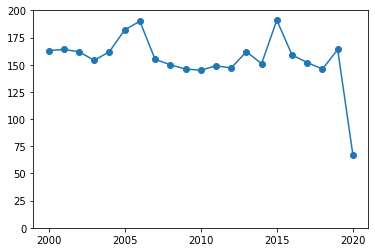

In [7]:
plt.plot(disaster_each_year,'o-')
plt.locator_params(integer=True)
plt.ylim((0, 200))
plt.show()

Ta thấy số lượng disaster ở năm 2020 thấp hơn hẳn so với trung bình các năm còn lại. Hãy xem dữ liệu của ta được record đến thời gian nào.

In [8]:
temp_df = disaster_df[['Start Month', 'Start Day']][disaster_df['Year'] == 2020]
latest_month = temp_df[temp_df['Start Month'] == temp_df['Start Month'].max()]
latest_record = latest_month[latest_month['Start Day'] == latest_month['Start Day'].max()]

print(latest_record)

     Start Month Start Day
3259           7        22


Record mới nhất là vào 22/7, mới chỉ nửa năm nên số lượng thấp hơn nhiều so với các năm khác.

### Tỉ lệ xuất hiện của các loại thảm họa

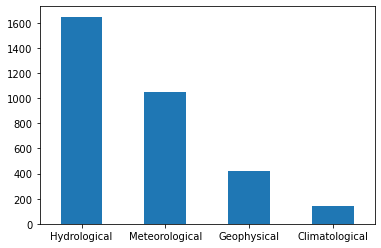

In [9]:
disaster_group_ratio = disaster_df['Disaster Subgroup'].value_counts()
disaster_group_ratio.plot.bar(rot=0)
plt.show()

Bar chart ở phía trên thể hiện cho tỉ lệ từng nhóm thảm họa. Ta sẽ vẽ thêm một bar chart để xem tỉ lệ của từng loại cụ thể.

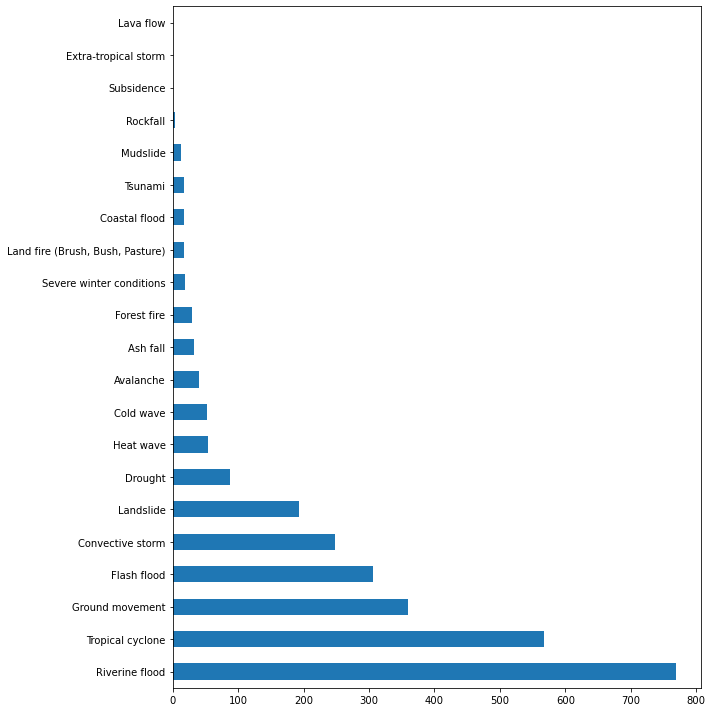

In [10]:
disaster_type_ratio = disaster_df['Disaster Subtype'].value_counts()
disaster_type_ratio.plot.barh(figsize=(10, 10), rot=0)
plt.tight_layout()
plt.show()

Vì từng nhóm thảm họa gồm có nhiều loại thảm họa khác nhau, nhưng 2 bar chart không cho ta được cái nhìn chung. Ta cần tìm cách gom nhóm 2 bar chart này lại.

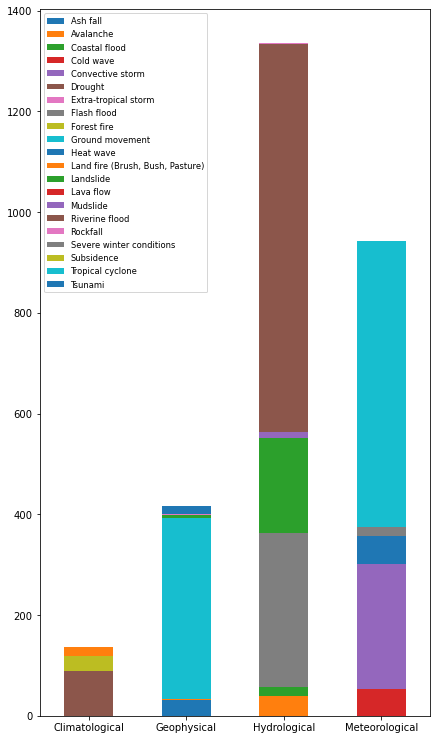

In [11]:
stack_disaster = disaster_df.groupby('Disaster Subgroup')['Disaster Subtype'].value_counts()
stack_disaster.unstack().plot.bar(figsize=(7, 13), stacked=True, rot=0)
plt.xlabel('')
plt.legend(loc='upper left', fontsize='small')
plt.show()

### Sự ảnh hưởng của thảm họa tự nhiên đối với các nước

Ta xem xét số lượng thảm họa xảy ra với các nước trong suốt 20 năm qua.

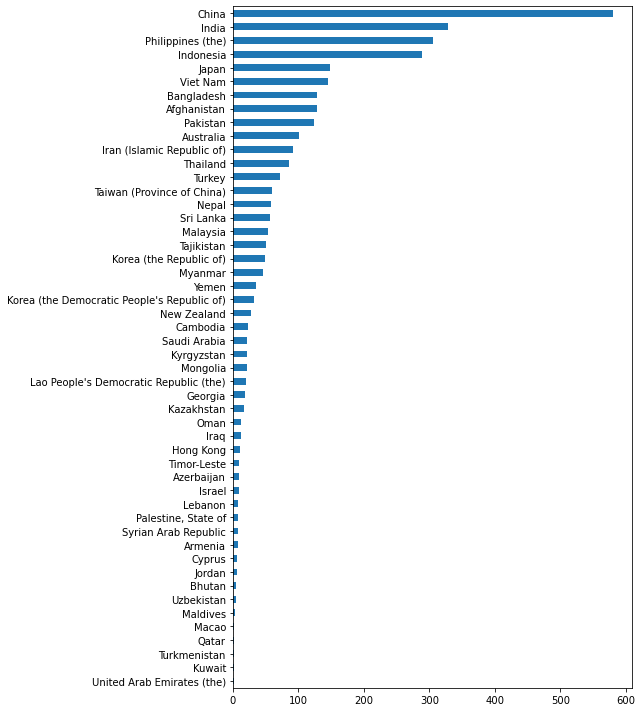

In [12]:
count_disaster_by_country = disaster_df['Country'].value_counts(ascending=True)
count_disaster_by_country.plot.barh(figsize=(9, 10))
plt.tight_layout()
plt.show()

Theo như bar chart, ta thấy 3 nước bị ảnh hưởng nhiều nhất là Trung Quốc, Ấn Độ và Philippines. 

Trung Quốc và Ấn Độ thì do diện tích của 2 nước này thuộc top lớn nhất Châu Á mà lại gần biển nên việc có nhiều thảm họa tự nhiên là điều hiển nhiên. Còn Philippines, quốc gia nằm giữa biển nên việc hứng chịu bão nhiệt đới là không thể tránh khỏi.

In [13]:
disaster_in_phi = disaster_df[disaster_df['Country'] == 'Philippines (the)']['Disaster Subtype'].value_counts()
disaster_in_phi

Tropical cyclone    151
Riverine flood       47
Flash flood          29
Ground movement      18
Landslide            12
Ash fall             10
Coastal flood         6
Drought               4
Convective storm      2
Lava flow             1
Avalanche             1
Subsidence            1
Name: Disaster Subtype, dtype: int64

## Đưa ra các câu hỏi cần trả lời

Sau khi khám phá xong dữ liệu, ta thấy có một vài câu hỏi đáng quan tâm:
1. Top 5 loại thảm họa xuất hiện nhiều nhất và top 3 nước xảy ra loại thảm họa đó nhiều nhất. 
2. Thiệt hại của các thảm họa thay đổi thế nào qua các năm? Những nước bị thiệt hại vì thảm họa cao nhất trong thập kỷ vừa qua? Loại thảm họa nào gây thiệt hại cao nhất? Thiệt hại ở đây được tính bằng giá trị ở cột Total Damages.
3. Tình hình thảm họa tại Việt Nam trong 21 năm đầu thế kỷ mới.

## Trả lời các câu hỏi

### Câu 1

In [14]:
top_5_disaster = disaster_df['Disaster Subtype'].value_counts().nlargest(5).index.tolist()
top_5_disaster

['Riverine flood',
 'Tropical cyclone',
 'Ground movement',
 'Flash flood',
 'Convective storm']

In [15]:
country_list = []
for dis in top_5_disaster:
    top_3 = disaster_df[disaster_df['Disaster Subtype'] == dis]['Country'].value_counts().head(3)
    country_list.append(top_3.index.tolist())

top_3_country = pd.DataFrame({'Countries': country_list}, index=top_5_disaster).T
top_3_country

,Riverine flood,Tropical cyclone,Ground movement,Flash flood,Convective storm
Countries,"[China, India, Indonesia]","[Philippines (the), China, Japan]","[China, Indonesia, Iran (Islamic Republic of)]","[Indonesia, Philippines (the), Afghanistan]","[China, India, Bangladesh]"


Qua dataframe ở trên, ta thấy được những loại thảm họa phổ biến thường xảy ra ở những nước nào.
- Về Trung Quốc, vì diện tích của nước này rất lớn nên có nhiều kiểu khí hậu, địa hình khác nhau. Việc những thảm họa phổ biến đều xuất hiện ở Trung Quốc là điều dễ hiểu.
- Các loại thảm họa cũng phản ánh một phần về vị trí địa lý cũng như tính chất địa hình của nước đó. Chẳng hạn như lũ lụt xảy ra nhiều ở Trung Quốc và Ấn Độ vì 2 nước này có hệ thống sông ngòi lớn.

### Câu 2

#### Thiệt hại qua các năm 

In [16]:
total_damages = disaster_df.groupby('Year')[['Total Damages (\'000 US$)']].agg('sum')
total_damages

,Total Damages ('000 US$)
Year,
2000,21860034.0
2001,11899109.0
2002,15369256.0
2003,24265948.0
2004,66444236.0
2005,27571778.0
2006,24974201.0
2007,35945932.0
2008,121005088.0


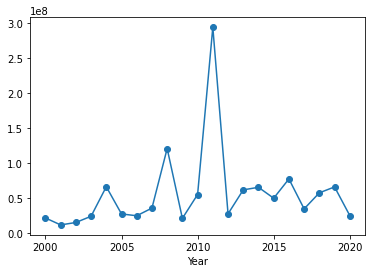

In [17]:
total_damages = disaster_df.groupby('Year')[['Total Damages (\'000 US$)']].agg('sum')
total_damages.plot.line(style='-o')
plt.locator_params(integer=True)
plt.legend().remove()
plt.show()

Từ line chart trên, ta thấy ở năm 2011, total damages cao bất thường. Ta hãy xem trong năm 2011, chuyện gì đã xảy ra?

In [18]:
year_2011 = disaster_df[['Disaster Subtype', 'Country', 'Total Damages (\'000 US$)']][disaster_df['Year'] == 2011]
year_2011 = year_2011[year_2011['Total Damages (\'000 US$)'].notna()]
print('Tổng số record:', len(year_2011))
year_2011

Tổng số record: 56


,Disaster Subtype,Country,Total Damages ('000 US$)
1601,Riverine flood,China,54130.0
1602,Riverine flood,China,6400000.0
1603,Riverine flood,China,4250000.0
1605,Tropical cyclone,Australia,2500000.0
1606,Tropical cyclone,China,482585.0
1607,Tropical cyclone,China,219000.0
1613,Convective storm,China,15000.0
1615,Ground movement,China,290000.0
1618,Ground movement,China,56400.0
1624,Cold wave,China,281000.0


Năm 2011 có 56 record được thống kê thiệt hại, nhìn sơ thì khá là rối. Ta hãy lấy ra 10 sự kiện có thiệt hại cao nhất.

In [19]:
top_damages_2011 = year_2011.sort_values('Total Damages (\'000 US$)',ascending=False).head(10)
top_damages_2011

,Disaster Subtype,Country,Total Damages ('000 US$)
1788,Tsunami,Japan,210000000.0
1802,Riverine flood,Thailand,40000000.0
1833,Ground movement,New Zealand,15000000.0
1602,Riverine flood,China,6400000.0
1603,Riverine flood,China,4250000.0
1796,Ground movement,New Zealand,3000000.0
1605,Tropical cyclone,Australia,2500000.0
1836,Riverine flood,Pakistan,2500000.0
1806,Tropical cyclone,Japan,1820000.0
1855,Ground movement,Turkey,1500000.0


Vào năm 2011, ở Nhật Bản diễn ra trận sóng thần Tōhoku sau trận động đất 9 độ Richter. Kết cục của nó thì mọi người cũng đã biết, sóng thần cũng có sức tàn phá rất lớn. Nhưng chưa dừng ở đó, nhà máy điện hạt nhân Fukushima gặp sự cố làm nguội và phát nổ. Sự kiện thảm họa kép này gây ra thiệt hại rất lớn về người và của ở Nhật Bản.

Một số hình ảnh về sự kiện thảm họa kép này.

Nguồn: [Thảm họa tại Nhật Bản](https://zingnews.vn/khoanh-khac-song-than-cao-10-m-ap-vao-nhat-ban-nam-2011-post519302.html)

![Tsunami](disaster1.jpg 'Sóng thần tại Nhật Bản 2011')
![Tsunami](disaster2.jpg 'Vụ nổ nhà máy điện hạt nhân')

#### Thiệt hại của các nước trong thập kỷ vừa qua

Ta lấy ra những record được ghi lại từ năm 2010 đến nay.

In [20]:
last_decade = disaster_df[disaster_df['Year'] >= 2010]
print('Tổng số record:', len(last_decade))

Tổng số record: 1633


Lấy danh sách 3 nước có thiệt hại cao nhất theo từng năm.

In [21]:
top_damages_by_year = last_decade.groupby(['Year', 'Country'], sort=True).sum().reset_index()[
    ['Year', 'Country', 'Total Damages (\'000 US$)']]
top_damages_by_year = top_damages_by_year.sort_values(['Year', 'Total Damages (\'000 US$)'], ascending=[True, False])
top_country_damages_by_year = top_damages_by_year.groupby('Year').head(3).reset_index(drop=True)

top_country_damages_by_year

,Year,Country,Total Damages ('000 US$)
0,2010,China,22675436.0
1,2010,Australia,10129000.0
2,2010,Pakistan,9598000.0
3,2011,Japan,212520000.0
4,2011,Thailand,40317000.0
5,2011,New Zealand,18000000.0
6,2012,China,19754533.0
7,2012,Pakistan,2500000.0
8,2012,Japan,1702400.0
9,2013,China,35448900.0


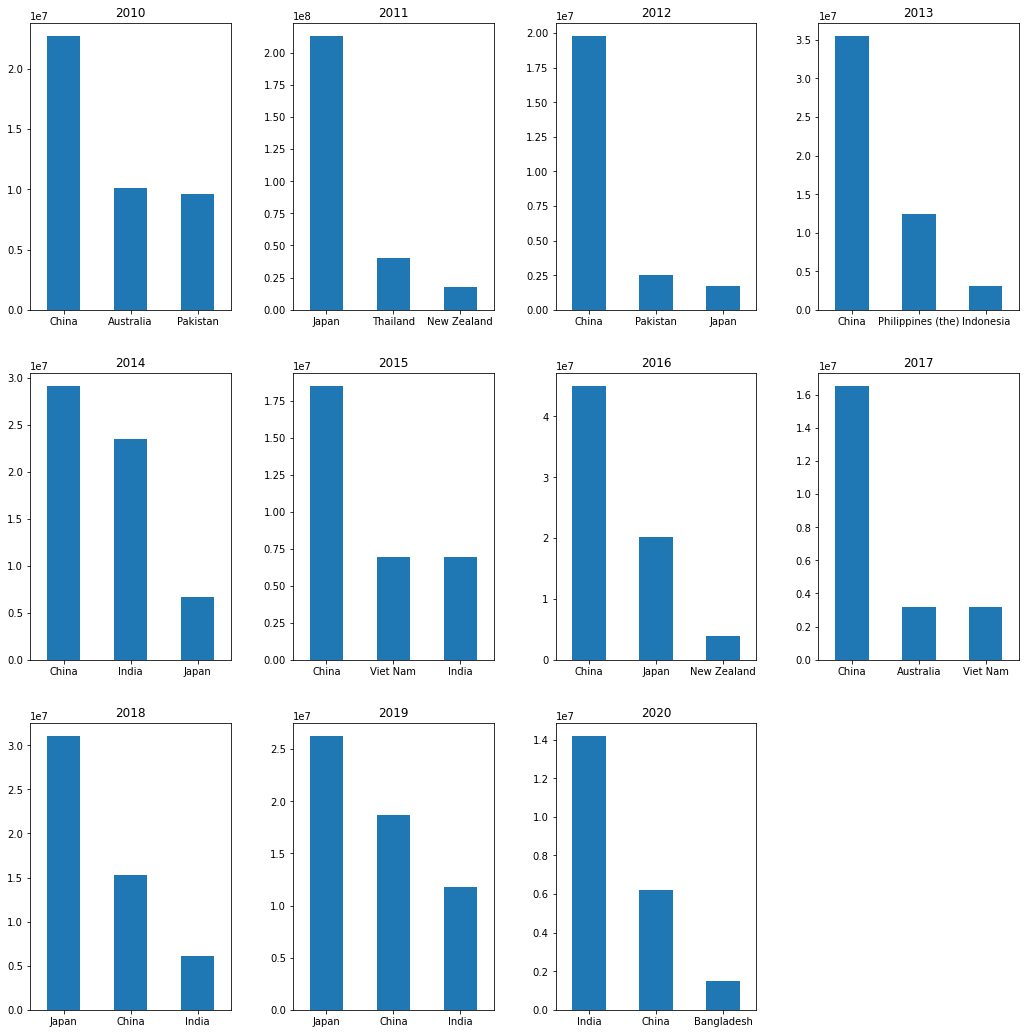

In [22]:
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

year = 2010
for i in range(3):
    for j in range(4):
        if year > 2020:
            pass
        else:
            temp_df = top_country_damages_by_year[top_country_damages_by_year['Year'] == year]
            temp_series = temp_df['Total Damages (\'000 US$)']
            temp_series.index = temp_df['Country']
            temp_series.plot.bar(ax=axs[i, j], rot=0,)
            axs[i, j].set_title(str(year))
            axs[i, j].set_xlabel('')
            year += 1
fig.tight_layout(pad=3.0)
fig.delaxes(axs[2][3])
plt.show()

Ta thấy hầu như năm nào trong thập kỷ vừa rồi, Trung Quốc đều nằm trong top các nước chịu thiệt hại cao nhất nhưng Trung Quốc vẫn thuộc trong top những nước phát triển nhất thế giới. Dù Trung Quốc có nhiều điểm đáng chê, nhưng về mặt khắc phục thiệt hại và phát triển đất nước thì Trung Quốc rất đáng ngưỡng mộ.

#### Loại thảm họa gây nhiều thiệt hại nhất

In [23]:
top_damage_disaster = disaster_df.groupby('Disaster Subtype')['Total Damages (\'000 US$)'].sum()
top_damage_disaster = top_damage_disaster.sort_values(ascending=False)
top_damage_disaster

Disaster Subtype
Tropical cyclone                    257931391.0
Riverine flood                      233808373.0
Ground movement                     227351790.0
Tsunami                             225566000.0
Drought                              41541359.0
Convective storm                     34824615.0
Flash flood                          29076593.0
Severe winter conditions             21960200.0
Coastal flood                         8242520.0
Land fire (Brush, Bush, Pasture)      4866000.0
Cold wave                             2070133.0
Forest fire                           1824000.0
Landslide                             1151485.0
Mudslide                               995600.0
Heat wave                              619000.0
Ash fall                               256794.0
Avalanche                               53000.0
Lava flow                                3564.0
Extra-tropical storm                     1500.0
Rockfall                                    0.0
Subsidence             

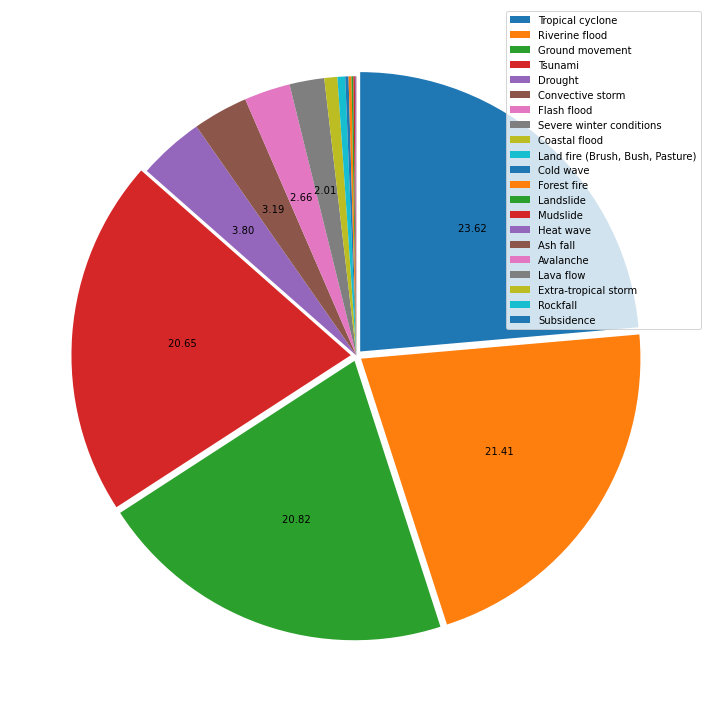

In [24]:
def my_autopct(pct):
    return ('%.2f ' % pct) if pct > 1 else ''


percentage = top_damage_disaster / sum(top_damage_disaster)
explode = (percentage.values > 0.1).astype(float)
explode[explode > 0] = 0.02
plt.pie(top_damage_disaster.values, explode=explode, autopct=my_autopct, radius=1, startangle=90, counterclock=False)
plt.legend(top_damage_disaster.index, loc="upper right")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.tight_layout()
plt.show()

Từ pie chart trên, ta thấy được Châu Á và Châu Đại Dương chịu ảnh hưởng chủ yếu từ bão, động đất, sóng thần và lũ lụt. 

Việt Nam không phải là ngoại lệ, hàng năm có hàng chục trận bão lớn nhỏ xuất hiện, kèm theo đó là lũ lụt,v.v. Nhưng vì nước mình đã được Philippines che đỡ đi phần nào thảm họa nên sức ảnh hưởng của các thảm họa ko nhiều như các nước khác.

### Câu 3

Đây có lẽ là phần quan trọng nhất khi tìm hiểu về dữ liệu này. Qua phần này ta sẽ có được cái nhìn tổng quát về tình hình về thảm họa thiên nhiên ở Việt Nam trong 20 năm đầu của thế kỳ XXI.

#### Tổng số lượng  thảm họa tại Việt Nam 

Đầu tiên, hãy lấy ra những record thảm họa xảy ra tại Việt Nam.

In [25]:
disaster_in_vn = disaster_df[disaster_df['Country']== 'Viet Nam']
disaster_in_vn

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Country,Region,...,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
170,2000-0542-VNM,2000,542,Natural,Meteorological,Storm,Convective storm,Tornado,Viet Nam,South-Eastern Asia,...,8.0,24.0,NaN,4.0,NaN,130.0,134.0,NaN,NaN,NaN
171,2000-0408-VNM,2000,408,Natural,Hydrological,Flood,Riverine flood,NaN,Viet Nam,South-Eastern Asia,...,11.0,NaN,460.0,4.0,5000000.0,NaN,5000004.0,NaN,NaN,250000.0
172,2000-0748-VNM,2000,748,Natural,Hydrological,Flood,Riverine flood,NaN,Viet Nam,South-Eastern Asia,...,11.0,26.0,36.0,3.0,25000.0,NaN,25003.0,NaN,NaN,15000.0
173,2000-0439-VNM,2000,439,Natural,Hydrological,Landslide,Landslide,NaN,Viet Nam,South-Eastern Asia,...,7.0,22.0,33.0,22.0,NaN,NaN,22.0,NaN,NaN,NaN
174,2000-0680-VNM,2000,680,Natural,Hydrological,Landslide,Landslide,NaN,Viet Nam,South-Eastern Asia,...,10.0,3.0,40.0,17.0,NaN,NaN,17.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,2019-9359-VNM,2019,9359,Natural,Climatological,Drought,Drought,NaN,Viet Nam,South-Eastern Asia,...,2.0,NaN,NaN,NaN,685558.0,NaN,685558.0,NaN,NaN,NaN
3169,2019-0393-VNM,2019,393,Natural,Hydrological,Flood,NaN,NaN,Viet Nam,South-Eastern Asia,...,8.0,10.0,12.0,5.0,61535.0,NaN,61540.0,NaN,NaN,NaN
3170,2019-0419-VNM,2019,419,Natural,Hydrological,Flood,NaN,NaN,Viet Nam,South-Eastern Asia,...,9.0,11.0,10.0,NaN,36450.0,NaN,36450.0,NaN,NaN,NaN
3200,2020-0088-VNM,2020,88,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Viet Nam,South-Eastern Asia,...,3.0,10.0,5.0,17.0,4635.0,NaN,4652.0,NaN,NaN,1500.0


Dataframe ở trên có 145 dòng, nghĩa là trong 21 năm qua, có 145 vụ thảm họa diễn ra ở Việt Nam được EM-DAT ghi nhận và thống kê.

Con số 145 trong vòng 21 năm có vẻ khá là ít so với cảm nhận của chúng ta về sự thay đổi thời tiết trong vòng vài năm trở lại đây. Có lẽ EM-DAT không thể tổng hợp hết tất cả các thảm họa được.

#### Sự thay đổi về số lượng thảm họa qua các năm

In [26]:
yearly_count_vn = disaster_in_vn.groupby('Year')['Disaster Subtype'].value_counts()
yearly_count_vn

Year  Disaster Subtype    
2000  Landslide               2
      Riverine flood          2
      Tropical cyclone        2
      Convective storm        1
2001  Tropical cyclone        3
                             ..
2019  Tropical cyclone        2
      Drought                 1
      Flash flood             1
2020  Convective storm        1
      Extra-tropical storm    1
Name: Disaster Subtype, Length: 61, dtype: int64

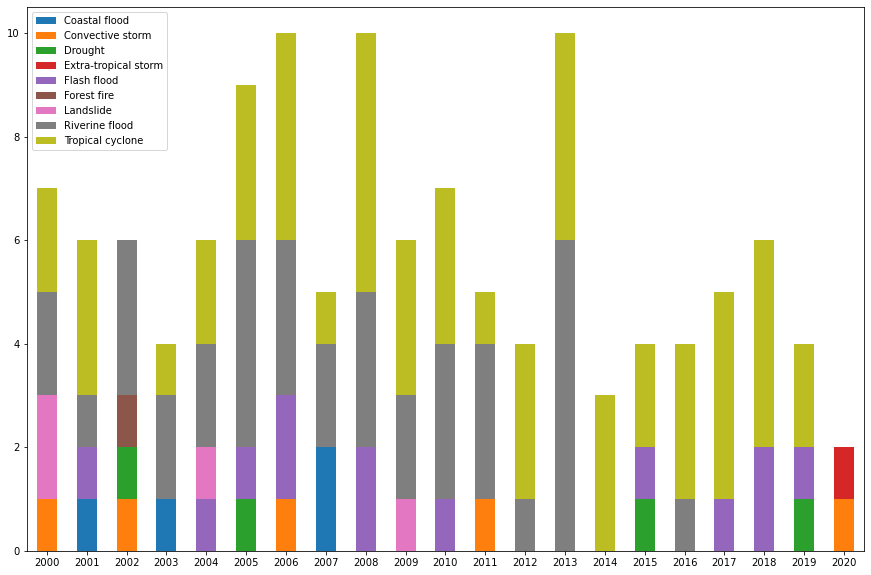

In [27]:
yearly_count_vn.unstack().plot.bar(figsize=(15, 10), stacked=True, rot=0)
plt.xlabel('')
plt.legend(loc='upper left')
plt.show()

Nhìn sơ qua bar chart ở trên thì ta có thể thấy được chủ yếu thảm họa tại Việt Nam là bão nhiệt đới và lũ lụt. Điều này khá là chính xác với thực tế mà ta có thể quan sát được.

#### Tần suất xuất hiện của thảm họa theo tháng

In [28]:
monthly_count_vn = disaster_in_vn.groupby('Start Month')['Disaster Subtype'].value_counts()
monthly_count_vn

Start Month  Disaster Subtype    
3            Extra-tropical storm     1
             Forest fire              1
4            Convective storm         1
             Riverine flood           1
5            Drought                  2
             Flash flood              1
             Riverine flood           1
             Tropical cyclone         1
6            Tropical cyclone         4
             Convective storm         1
             Flash flood              1
7            Tropical cyclone        10
             Flash flood              4
             Riverine flood           4
             Drought                  1
             Landslide                1
8            Tropical cyclone         9
             Riverine flood           5
             Flash flood              2
             Coastal flood            1
             Convective storm         1
9            Riverine flood          12
             Tropical cyclone        12
             Landslide                1
10    

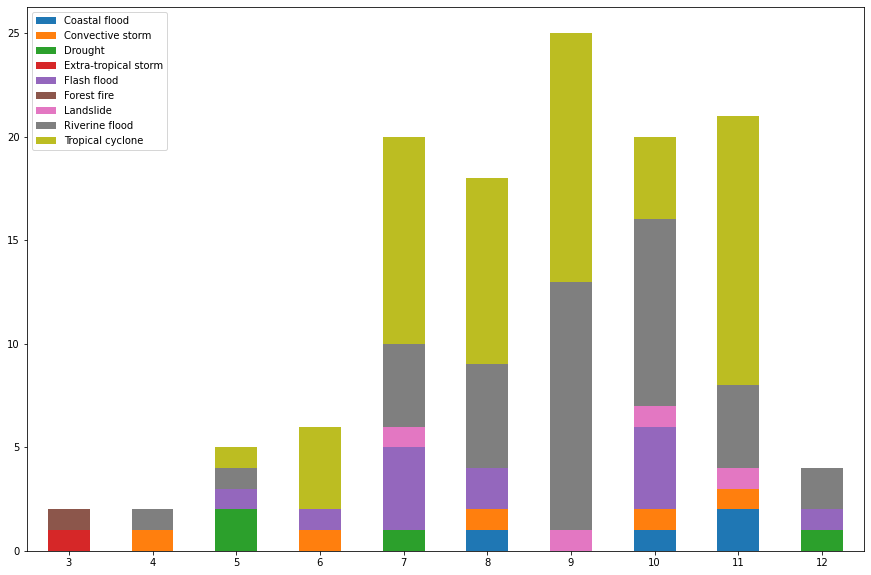

In [29]:
monthly_count_vn.unstack().plot.bar(figsize=(15, 10), stacked=True, rot=0)
plt.xlabel('')
plt.legend(loc='upper left')
plt.show()

Tương tự như tổng kết số lượng theo năm, ta cũng đánh giá số lượng theo từng tháng. 

Ta thấy được số lượng thảm họa tăng đột biến vào tháng 7 đến tháng 11.
Đây là mùa mưa bão đặc trưng của Việt Nam, nên số lượng tăng lên không có gì lạ.

Điều kỳ lạ ở đây là EM-DAT không thống kê được bất kỳ record nào vào tháng 1 và tháng 2? Có thể là do một số lý do sau:
- Tháng 1 và tháng 2 thường nằm vào thời gian đầu năm mới theo âm lịch. Mà khoảng thời gian này thời tiết ở Việt Nam rất đẹp, hiếm khi có thảm họa tự nhiên, hoặc nếu có thì ảnh hưởng rất thấp, không đáng kể nên EM-DAT không thống kê.
- Như ở trên, 2 tháng này thường trùng vào đầu năm mới âm lịch. Người dân Việt Nam ăn mừng năm mới, không có ai đi tổng kết, thống kê các thiên tai để bổ sung vào cơ sở dữ liệu. 🤔

#### Mức độ ảnh hưởng của thiên tai

Mức độ ảnh hưởng ở đây được tính bởi cột Total Damages, là số tiền để khắc phục hậu quả của thiên tai gây ra.

**Theo năm**

In [30]:
damages_by_year = disaster_in_vn.groupby('Year')['Total Damages (\'000 US$)'].sum()
damages_by_year

Year
2000     291035.0
2001     171900.0
2002     284200.0
2003     105000.0
2004      38000.0
2005     346370.0
2006    1099000.0
2007     981000.0
2008     673500.0
2009    1065200.0
2010     704700.0
2011     219002.0
2012     372800.0
2013    1552730.0
2014      10700.0
2015    6966800.0
2016     846437.0
2017    3162655.0
2018     287200.0
2019      49000.0
2020       1500.0
Name: Total Damages ('000 US$), dtype: float64

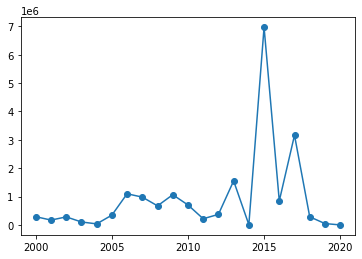

In [31]:
plt.plot(damages_by_year,'o-')
plt.locator_params(integer=True)
plt.show()

Năm 2015, thiệt hại tăng lên đột biến. Ta xem xét những thiên tai ở năm này.

In [32]:
year_2015 = disaster_in_vn[disaster_in_vn['Year'] == 2015]
year_2015

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Country,Region,...,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
2647,2015-0292-VNM,2015,292,Natural,Hydrological,Flood,Flash flood,NaN,Viet Nam,South-Eastern Asia,...,8.0,5.0,32.0,NaN,15000.0,NaN,15000.0,NaN,NaN,204000.0
2674,2015-0252-VNM,2015,252,Natural,Meteorological,Storm,Tropical cyclone,NaN,Viet Nam,South-Eastern Asia,...,6.0,29.0,7.0,NaN,NaN,115.0,115.0,NaN,NaN,NaN
2675,2015-9617-VNM,2015,9617,Natural,Climatological,Drought,Drought,NaN,Viet Nam,South-Eastern Asia,...,2.0,NaN,NaN,NaN,1750000.0,NaN,1750000.0,NaN,NaN,6750000.0
2676,2015-0460-VNM,2015,460,Natural,Hydrological,Flood,NaN,NaN,Viet Nam,South-Eastern Asia,...,9.0,11.0,2.0,NaN,100.0,NaN,100.0,NaN,NaN,NaN
3116,2015-0620-VNM,2015,620,Natural,Meteorological,Storm,Tropical cyclone,NaN,Viet Nam,South-Eastern Asia,...,9.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,12800.0


Hãy bỏ đi những cột không cần thiết để dễ nhìn hơn.

In [33]:
year_2015 = year_2015[['Disaster Type', 'Disaster Subtype','Start Month','Location','Total Affected','Total Damages (\'000 US$)']]
year_2015

,Disaster Type,Disaster Subtype,Start Month,Location,Total Affected,Total Damages ('000 US$)
2647,Flood,Flash flood,7,Quang Ninh province,15000.0,204000.0
2674,Storm,Tropical cyclone,6,Son La province,115.0,NaN
2675,Drought,Drought,12,"An Giang, Ba Ria-Vung Tau, Ben Tre, Binh Dinh,...",1750000.0,6750000.0
2676,Flood,NaN,9,"Minh Tien village (Vi Xuyen district, Ha Giang...",100.0,NaN
3116,Storm,Tropical cyclone,9,"Da Nang, Quang Nam (Duy Xuyen, Nong Son distri...",NaN,12800.0


Năm 2015 là năm mà nước ta chịu hạn hán ở khắp miền Bắc và lũ lụt ở các tỉnh miền Trung ở mức độ khắc nghiệt bất thường. Nền nhiệt cao kỷ lục cùng với mưa lớn, ngập lụt kéo dài nhiều ngày ở khắp nơi khiến cho nền nông nghiệp nước ta chịu ảnh hưởng nặng nề.

---

## Nhìn lại quá trình làm đồ án 

### Khó khăn gặp phải 

Trong quá trình làm đồ án, một số khó khăn mà em gặp phải là:
1. Khó khăn trong việc tìm dữ liệu mà mình thực sự muốn làm.
2. Chọn ra những câu hỏi để trả lời.

### Những điều học được 

Sau khi hoàn thiện đồ án, em cảm thấy học được một số điều:
1. Kiến thức về các pandas, numpy library được cải thiện.
2. Khả năng trình bày dữ liệu trực quan được cải thiện.

**Nếu có thêm thời gian**

Có lẽ em sẽ đầu tư thêm thời gian hơn để tìm kiếm những câu hỏi hay hơn và cách giải quyết câu hỏi đó bằng dữ liệu một cách tốt hơn.

## Tài liệu tham khảo

Một số nguồn tài liệu tham khảo:
1. [Pandas](https://pandas.pydata.org/docs/)
2. [Numpy](https://numpy.org/devdocs/index.html)
3. [Matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)
4. [Stack overflow](https://stackoverflow.com/)